## 2D Transfromations

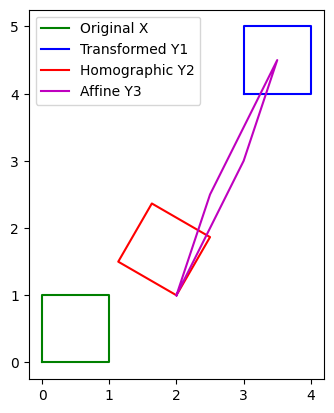

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Points a, b, c, d
a, b, c, d = [0, 0, 1], [0, 1, 1], [1, 1, 1], [1, 0, 1]

X = np.array([a, b, c, d]).T
Y1 = X + np.array([3, 4, 1]).reshape(3,1) # transfromed version of X

theta = np.pi/180*60
t = np.array([2, 1]).T
H = np.array([[np.cos(theta), -np.sin(theta), t[0]], [np.sin(theta), np.cos(theta), t[1]], [0, 0, 1]])
Y2 = H @ X

A  = np.array([[1, 0.5, t[0]], [2, 1.5, t[1]], [0, 0, 1]]) # Affine transformaiton
Y3 = A @ X
# Homographic transformation

x = np.append(X[0, :], X[0, 0])
y = np.append(X[1, :], X[1, 0])
fig, ax = plt.subplots(1,1)
ax.plot(x, y, color='g', label='Original X')

x = np.append(Y1[0, :], Y1[0, 0])
y = np.append(Y1[1, :], Y1[1, 0])
ax.plot(x, y, color='b', label='Transformed Y1')

x = np.append(Y2[0, :], Y2[0, 0])
y = np.append(Y2[1, :], Y2[1, 0])
ax.plot(x, y, color='r', label='Homographic Y2')

x = np.append(Y3[0, :], Y3[0, 0])
y = np.append(Y3[1, :], Y3[1, 0])
ax.plot(x, y, color='m', label='Affine Y3')

ax.set_aspect('equal')
ax.legend()
plt.show()

### Transforming Using a Given Homography

In [5]:
# Transfroming the first image onto the second
# Gaffiti images: https://www.robots.ox.ac.uk/~vgg/data/affine/
import numpy as np
import cv2 as cv
im1 = cv.imread(r'./graf/img1.ppm', cv.IMREAD_ANYCOLOR)
im2 = cv.imread(r'./graf/img2.ppm', cv.IMREAD_ANYCOLOR)
assert im1 is not None
assert im2 is not None

# H = np.array([[8.7976964e-01,   3.1245438e-01,  -3.9430589e+01],
#   [-1.8389418e-01,   9.3847198e-01,   1.5315784e+02],
#    [1.9641425e-04,  -1.6015275e-05,   1.0000000e+00]])

with open(r'./graf/H1to2p') as f:
   H = np.array([[float(h) for h in line.split()] for line in f])

im1to2 = cv.warpPerspective(im1, H, (1000,1000))

cv.namedWindow('Image 1', cv.WINDOW_AUTOSIZE)
cv.imshow('Image 1', im1)
cv.waitKey(0)
cv.namedWindow('Image 2', cv.WINDOW_AUTOSIZE)
cv.imshow('Image 2', im2)
cv.waitKey(0)
cv.namedWindow('Image 1 Warped', cv.WINDOW_AUTOSIZE)
cv.imshow('Image 1 Warped', im1to2)
cv.waitKey(0)
cv.destroyAllWindows()

### Transfroming the Second Image onto the First

In [6]:
import numpy as np
import cv2 as cv
im1 = cv.imread(r'./graf/img1.ppm', cv.IMREAD_ANYCOLOR)
im2 = cv.imread(r'./graf/img2.ppm', cv.IMREAD_ANYCOLOR)
assert im1 is not None
assert im2 is not None

with open(r'./graf/H1to2p') as f:
   H = np.array([[float(h) for h in line.split()] for line in f])

im2to1 = cv.warpPerspective(im2, np.linalg.inv(H), (1000,1000))
im2to1[0:im1.shape[0], 0:im1.shape[1]] = im1
im2to1[0:im1.shape[0], 0:im1.shape[1]] += np.array([50, 0, 0], dtype=np.uint8) # Change te color a little

cv.namedWindow('Image 1', cv.WINDOW_AUTOSIZE)
cv.imshow('Image 1', im1)
cv.waitKey(0)
cv.namedWindow('Image 2', cv.WINDOW_AUTOSIZE)
cv.imshow('Image 2', im2)
cv.waitKey(0)
cv.namedWindow('Image 1 Warped', cv.WINDOW_AUTOSIZE)
cv.imshow('Image 1 Warped', im2to1)
cv.waitKey(0)
cv.destroyAllWindows()

### 3. Computing the Homogrpahy Using Mouse-Clicked Points and Warping

In [2]:
import cv2 as cv
import numpy as np


N = 5
global n 
n = 0    
p1 = np.empty((N,2))
p2 = np.empty((N,2))

# mouse callback function
def draw_circle(event,x,y,flags,param):
    global n
    p = param[0]
    if event == cv.EVENT_LBUTTONDOWN:
        cv.circle(param[1],(x,y),5,(255,0,0),-1)        
        p[n] = (x,y)
        n += 1
          

im1 = cv.imread('./graf/img1.ppm', cv.IMREAD_ANYCOLOR)
im4 = cv.imread('./graf/img4.ppm', cv.IMREAD_ANYCOLOR)

im1copy = im1.copy()
im4copy = im4.copy()

cv.namedWindow('Image 1', cv.WINDOW_AUTOSIZE)

param = [p1, im1copy]
cv.setMouseCallback('Image 1',draw_circle, param)

while(1):
    cv.imshow("Image 1", im1copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break


param = [p2, im4copy]
n = 0
cv.namedWindow("Image 4", cv.WINDOW_AUTOSIZE)
cv.setMouseCallback('Image 4',draw_circle, param)

while(1):
    cv.imshow("Image 4", im4copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break


print(p1)
print(p2)

H = cv.findHomography(p1, p2)
H = H[0]
print(H)
im4_warped = cv.warpPerspective(im4, np.linalg.inv(H), (1000,1000))
im4_warped[0:im1.shape[0], 0:im1.shape[1]] = im1

cv.namedWindow("Image 4 Warped", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 4 Warped", im4_warped)
cv.waitKey(0)
cv.destroyAllWindows()

[[362. 234.]
 [775.  17.]
 [776. 617.]
 [ 96. 623.]
 [ 70.  45.]]
[[585.  67.]
 [617. 387.]
 [344. 456.]
 [168. 116.]
 [658. 236.]]
[[ 5.50779651e-01 -1.07174952e+00  7.35752275e+02]
 [ 7.44136712e-01 -9.96951763e-02  7.17010395e+01]
 [ 1.06303152e-03 -6.17089795e-04  1.00000000e+00]]


### Computing the Homogrpahy Using Mouse-Clicked Points without OpenCV

In [1]:
import cv2 as cv
import numpy as np


N = 5
global n 
n = 0    
p1 = np.empty((N,2))
p2 = np.empty((N,2))

# mouse callback function
def draw_circle(event,x,y,flags,param):
    global n
    p = param[0]
    if event == cv.EVENT_LBUTTONDOWN:
        cv.circle(param[1],(x,y),5,(255,0,0),-1)        
        p[n] = (x,y)
        n += 1
          

im1 = cv.imread('./graf/img1.ppm', cv.IMREAD_ANYCOLOR)
im4 = cv.imread('./graf/img4.ppm', cv.IMREAD_ANYCOLOR)

im1copy = im1.copy()
im4copy = im4.copy()
   

cv.namedWindow('Image 1', cv.WINDOW_AUTOSIZE)

param = [p1, im1copy]
cv.setMouseCallback('Image 1',draw_circle, param)

while(1):
    cv.imshow("Image 1", im1copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break


param = [p2, im4copy]
n = 0
cv.namedWindow("Image 4", cv.WINDOW_AUTOSIZE)
cv.setMouseCallback('Image 4',draw_circle, param)

while(1):
    cv.imshow("Image 4", im4copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break


print(p1)
print(p2)

A = np.empty((2*N, 9))

for i in range(0,N):
    xt = p1[i, :]
    xpt = p2[i, :]
    A[2*i, :] = np.array([0, 0, 0, xt[0], xt[1], 1, -xpt[1]*xt[0], -xpt[1]*xt[1], -xpt[1]])
    A[2*i+1, :] = np.array([xt[0], xt[1], 1, 0, 0, 0, -xpt[0]*xt[0], -xpt[0]*xt[1], -xpt[0]])    
    
print(A)

_, S, Vh = np.linalg.svd(np.matmul(A.T, A)) # See https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html
print(S)
Hhat = Vh[-1, :]
Hhat = Hhat.reshape(3,3)
Hhat = Hhat/Hhat[2,2]
print('Hhat', Hhat)

H = cv.findHomography(p1, p2)
H = H[0]
print('H using find homography', H)

im4_warped = cv.warpPerspective(im4, np.linalg.inv(Hhat), (1000,1000))
im4_warped[0:im1.shape[0], 0:im1.shape[1]] = im1

cv.namedWindow("Image 4 Warped", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 4 Warped", im4_warped)
cv.waitKey(0)
cv.destroyAllWindows()

[[427. 183.]
 [200. 222.]
 [319. 434.]
 [573. 453.]
 [594. 269.]]
[[524. 370.]
 [284. 268.]
 [292. 163.]
 [519. 144.]
 [434. 315.]]
[[ 0.00000e+00  0.00000e+00  0.00000e+00  4.27000e+02  1.83000e+02
   1.00000e+00 -1.57990e+05 -6.77100e+04 -3.70000e+02]
 [ 4.27000e+02  1.83000e+02  1.00000e+00  0.00000e+00  0.00000e+00
   0.00000e+00 -2.23748e+05 -9.58920e+04 -5.24000e+02]
 [ 0.00000e+00  0.00000e+00  0.00000e+00  2.00000e+02  2.22000e+02
   1.00000e+00 -5.36000e+04 -5.94960e+04 -2.68000e+02]
 [ 2.00000e+02  2.22000e+02  1.00000e+00  0.00000e+00  0.00000e+00
   0.00000e+00 -5.68000e+04 -6.30480e+04 -2.84000e+02]
 [ 0.00000e+00  0.00000e+00  0.00000e+00  3.19000e+02  4.34000e+02
   1.00000e+00 -5.19970e+04 -7.07420e+04 -1.63000e+02]
 [ 3.19000e+02  4.34000e+02  1.00000e+00  0.00000e+00  0.00000e+00
   0.00000e+00 -9.31480e+04 -1.26728e+05 -2.92000e+02]
 [ 0.00000e+00  0.00000e+00  0.00000e+00  5.73000e+02  4.53000e+02
   1.00000e+00 -8.25120e+04 -6.52320e+04 -1.44000e+02]
 [ 5.73000e+02